In [5]:
library(tidyverse)
library(ggplot2)

── Attaching core tidyverse packages ──────────────────────────────────────────────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [10]:
testing_data <- read_csv("testoutput25.csv") %>% mutate(turn = as.factor(turn))
#testing_data %>% colnames()
#testing_data <- testing_data %>% mutate_all(~ ifelse(. == -Inf, NaN, .))

Rows: 52205 Columns: 197
── Column specification ────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: ","
dbl (197): discardPile1, discardPile2, discardPile3, discardPile4, discardPi...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [11]:
moves <- c('4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', 'd1', 'd2', 'd3', 'd4', 'd5', 'd6', 'd7', 'd8', 'd9', 'd10', 'd11', 'd12', 'd13', 'd14', 'pickupPileJ', 'pickupPile2', 'pickup', 'wildJ4', 'wildJ5', 'wildJ6', 'wildJ7', 'wildJ8', 'wildJ9', 'wildJ10', 'wildJ11', 'wildJ12', 'wildJ13', 'wildJ14', 'wild24', 'wild25', 'wild26', 'wild27', 'wild28', 'wild29', 'wild210', 'wild211', 'wild212', 'wild213', 'wild214', 'goOut')
testing_data <- testing_data %>% mutate(move_name = moves[move+1])
testing_data$move_name <- factor(testing_data$move_name, levels = moves)

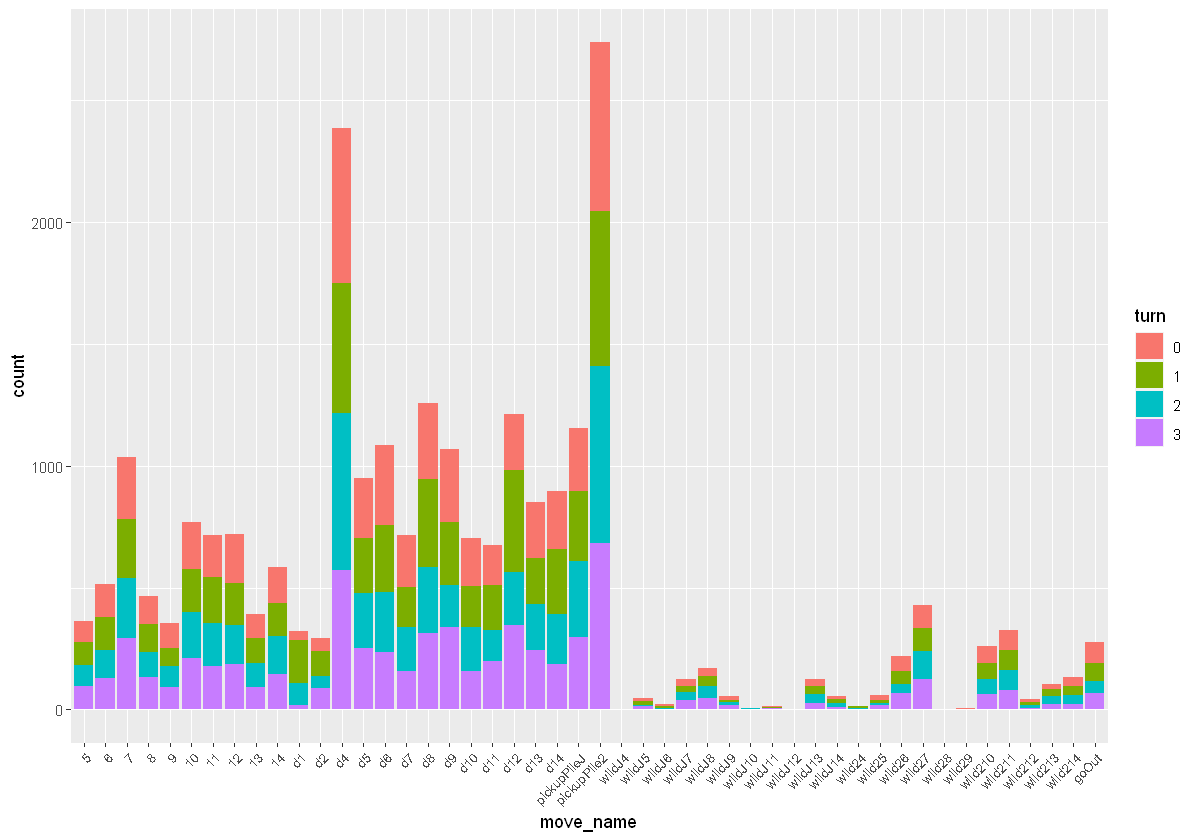

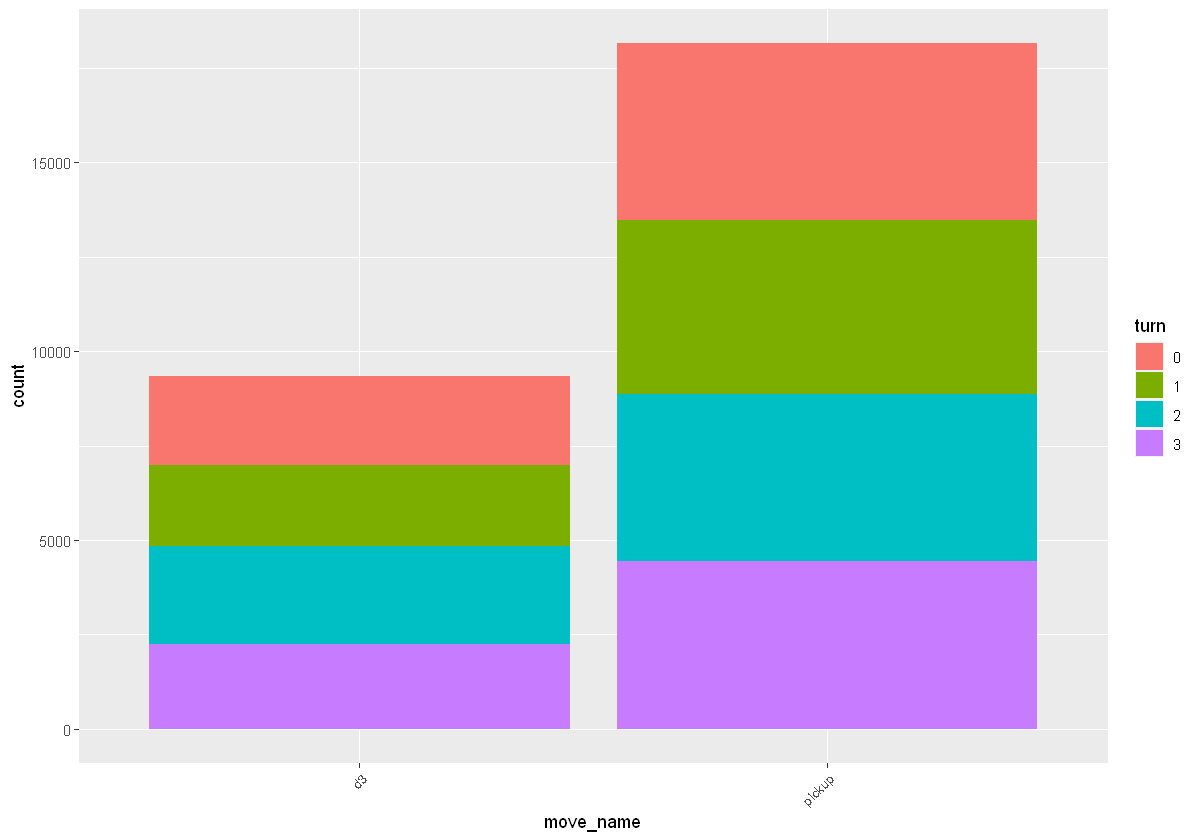

In [12]:
options(repr.plot.width = 10)
ggplot(data=testing_data %>% filter(move_name != "pickup", move_name != "d3"), aes(x = move_name, fill = turn)) + geom_bar() + theme(axis.text.x = element_text(angle = 45, hjust = 1,size = 8))
ggplot(data=testing_data %>% filter(move_name == "pickup" | move_name == "d3"), aes(x = move_name, fill = turn)) + geom_bar() + theme(axis.text.x = element_text(angle = 45, hjust = 1,size = 8))

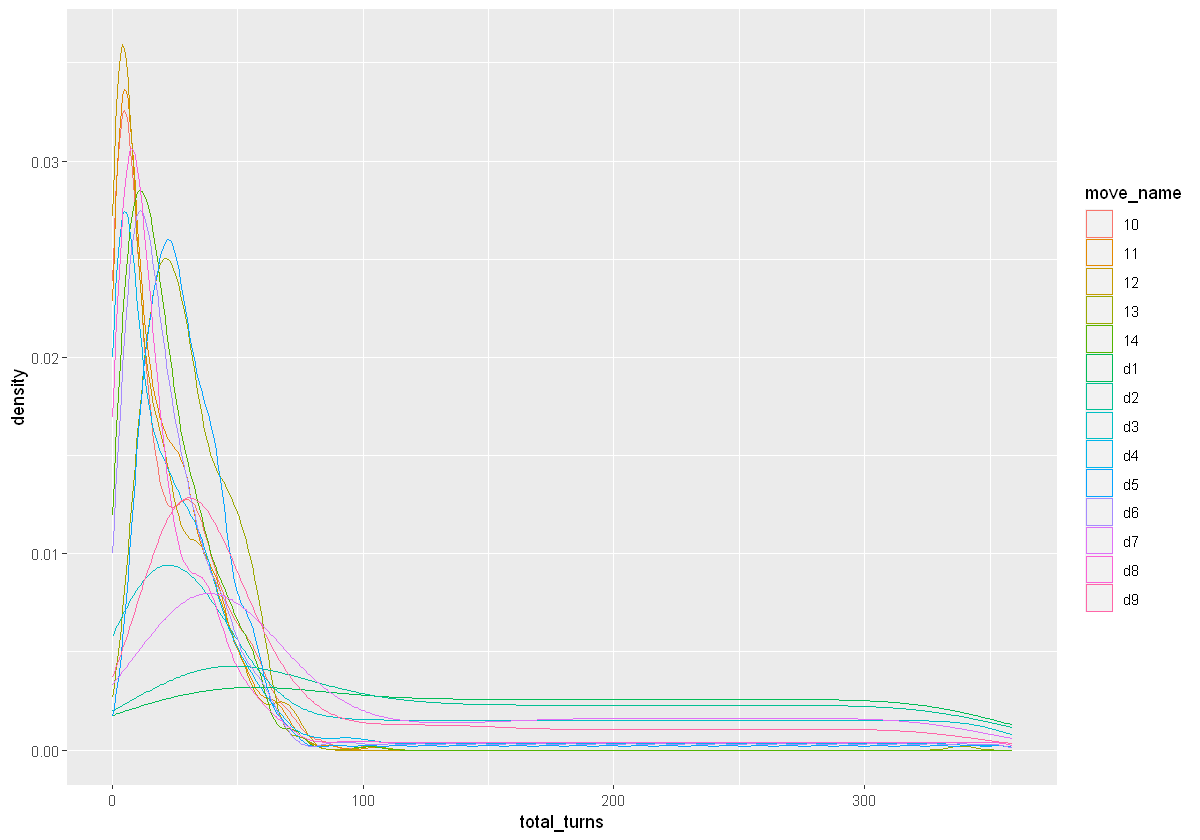

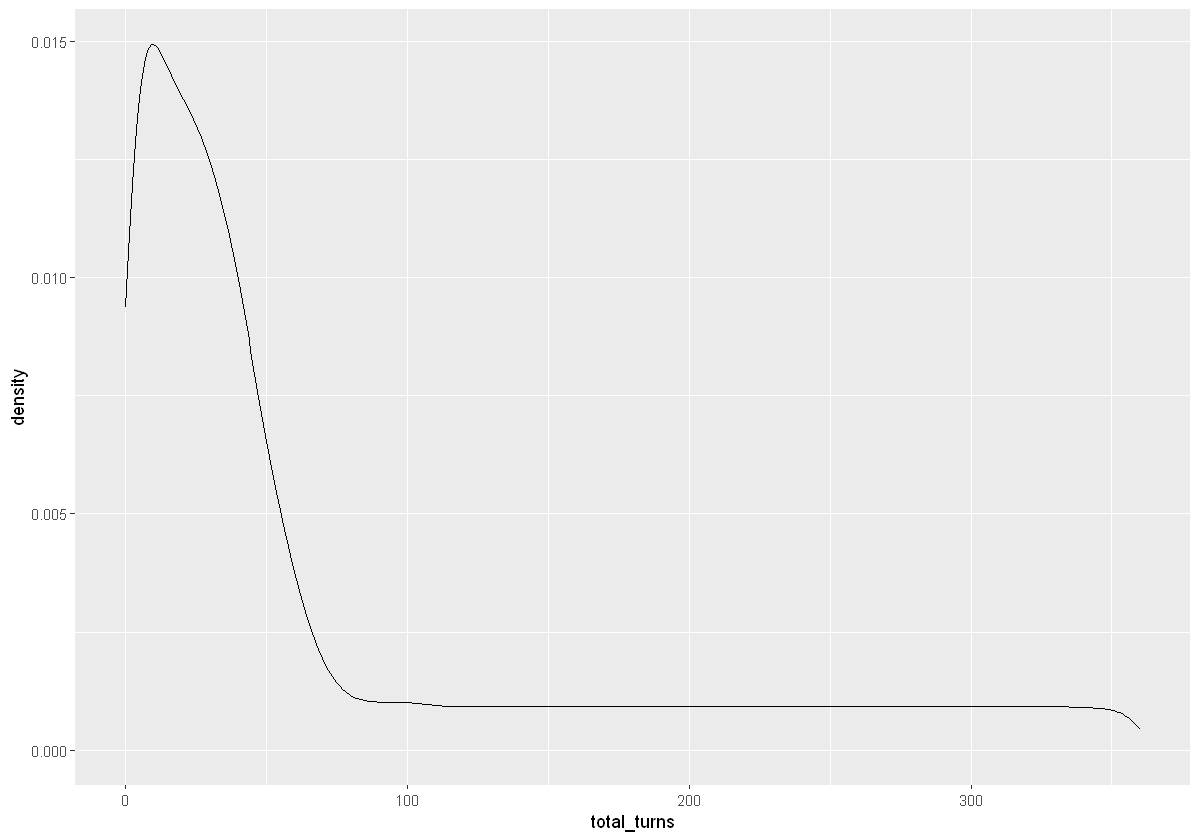

In [13]:
ggplot(data=testing_data %>% filter(nchar(as.character(move_name)) == 2)) + geom_density(aes(x=total_turns,color=move_name))
ggplot(data=testing_data) + geom_density(aes(x=total_turns))